In [8]:
import igraph as ig
from igraph import Graph
g = Graph(edges=[[0, 1], [2, 3]])

In [9]:
print(g.summary(verbosity=1))

IGRAPH U--- 4 2 -- 
+ edges:
0--1 2--3


In [10]:
g.vcount()

4

In [11]:
g.ecount()

2

In [12]:
g.incident(0)

[0]

In [13]:
g.get_edge_dataframe()

source  target
edge ID                
0             0       1
1             2       3

IGRAPH DN-- 10 10 -- 
+ attr: name (v)
+ edges (vertex names):
A1->B1, A1->B2, B1->C1, B2->C2, B2->C3, C1->D1, C3->D1, A1->B3, B3->C4, C4->D2


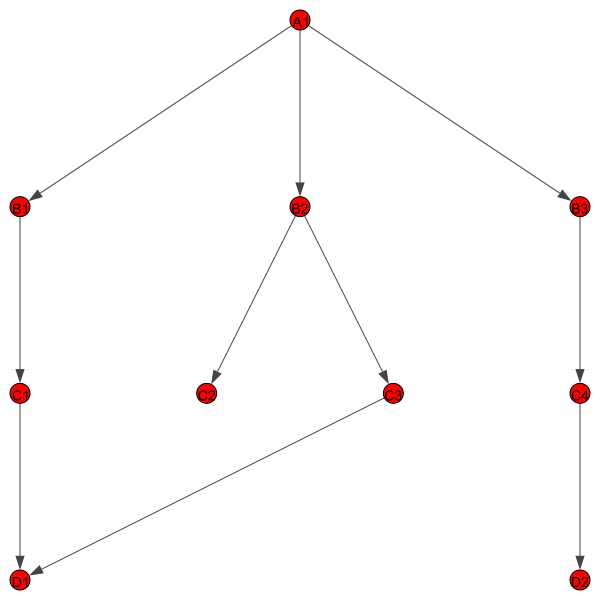

In [16]:
g = ig.Graph(directed=True)
g.add_vertices('A1 B1 B2 B3 C1 C2 C3 C4 D1 D2'.split())
edges = [("A1", "B1"),
         ("A1", "B2"),
         ("B1", "C1"), 
         ("B2", "C2"),
         ("B2", "C3"),
         ("C1", "D1"), 
         ("C3", "D1"),
         ("A1", "B3"),
         ("B3", "C4"),
         ("C4", "D2"),
         ]

g.add_edges(edges)

print(g.summary(verbosity=1))
layout = g.layout("tree")
g.vs["label"] = g.vs["name"]
ig.plot(g, layout=layout)

IGRAPH DN-- 10 10 -- 
+ attr: name (v)
+ edges (vertex names):
A1->B1, A1->B2, B1->C1, B2->C2, B2->C3, C1->D1, C3->D1, A1->B3, B3->C4, C4->D2


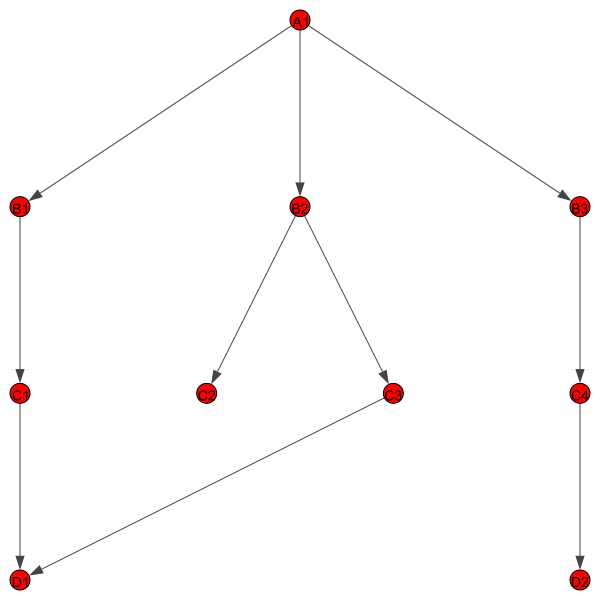

In [ ]:
g = ig.Graph(directed=True)
g.add_vertices('A1 B1 B2 B3 C1 C2 C3 C4 D1 D2'.split())
edges = [("A1", "B1"),
         ("A1", "B2"),
         ("B1", "C1"), 
         ("B2", "C2"),
         ("B2", "C3"),
         ("C1", "D1"), 
         ("C3", "D1"),
         ("A1", "B3"),
         ("B3", "C4"),
         ("C4", "D2"),
         ]

g.add_edges(edges)

print(g.summary(verbosity=1))
layout = g.layout("tree")
g.vs["label"] = g.vs["name"]
ig.plot(g, layout=layout)

IGRAPH DN-- 4 3 -- 
+ attr: name (v)
+ edges (vertex names):
A1->B1, B1->C5, C5->D1
IGRAPH DN-- 11 12 -- 
+ attr: label (v), name (v)
+ edges (vertex names):
A1->B1, A1->B2, B1->C1, B2->C2, B2->C3, C1->D1, C3->D1, A1->B3, B3->C4, C4->D2, B1->C5, C5->D1


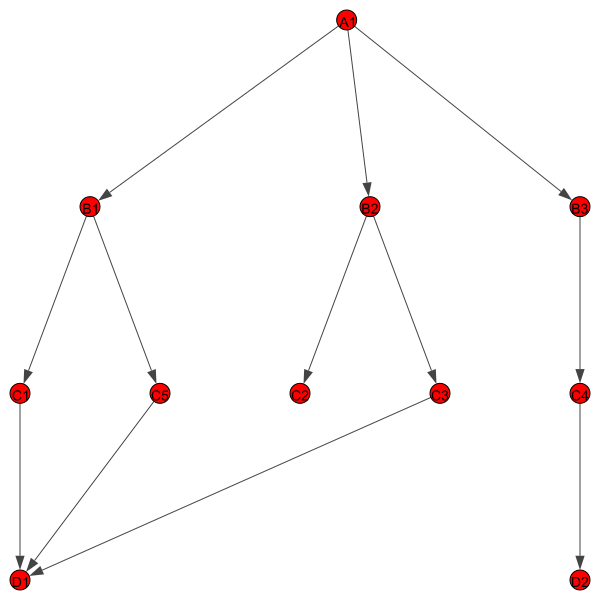

In [ ]:

g2 = ig.Graph(directed=True)
g2.add_vertices('A1 B1 C5 D1'.split())
edges = [("A1", "B1"),
         ("B1", "C5"), 
         ("C5", "D1")
         ]

g2.add_edges(edges)

print(g2.summary(verbosity=1))
g2.vs["label"] = g2.vs["name"]
ig.plot(g2, layout=g2.layout("tree"))

n = g.vs['name']
n2 = g2.vs['name']
g.add_vertices([x for x in n2 if x not in n])

tuples = [(n2[es.source], n2[es.target]) for es in g2.es]
edges = [tpl for tpl in tuples if not g.are_connected(*tpl)]
g.add_edges(edges)


# g += g2
print(g.summary(verbosity=1))
layout = g.layout("tree")
g.vs["label"] = g.vs["name"]
ig.plot(g, layout=layout)

IGRAPH DN-- 10 10 -- 
+ attr: name (v)
+ edges (vertex names):
A1->B1, A1->B2, B1->C1, B2->C2, B2->C3, C1->D1, C3->D1, A1->B3, B3->C4, C4->D2
IGRAPH DN-- 4 3 -- 
+ attr: name (v)
+ edges (vertex names):
A1->B1, B1->C5, C5->D1
IGRAPH DN-- 11 12 -- 
+ attr: name (v)
+ edges (vertex names):
C4->D2, C5->D1, A1->B2, A1->B3, A1->B1, C3->D1, B2->C3, B2->C2, B3->C4, B1->C5, B1->C1, C1->D1


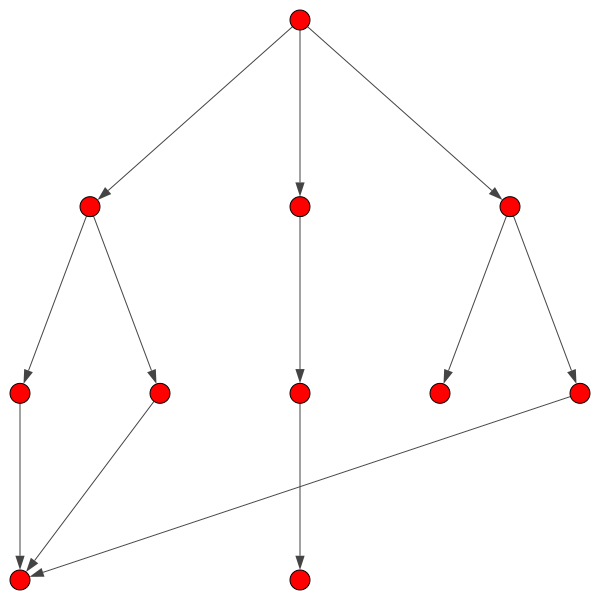

In [ ]:
g = ig.Graph(directed=True)
g.add_vertices('A1 B1 B2 B3 C1 C2 C3 C4 D1 D2'.split())
edges = [("A1", "B1"),
         ("A1", "B2"),
         ("B1", "C1"), 
         ("B2", "C2"),
         ("B2", "C3"),
         ("C1", "D1"), 
         ("C3", "D1"),
         ("A1", "B3"),
         ("B3", "C4"),
         ("C4", "D2"),
         ]

g.add_edges(edges)

print(g.summary(verbosity=1))
layout = g.layout("tree")
# g.vs["label"] = g.vs["name"]
ig.plot(g, layout=layout)

g2 = ig.Graph(directed=True)
g2.add_vertices('A1 B1 C5 D1'.split())
edges = [("A1", "B1"),
         ("B1", "C5"), 
         ("C5", "D1")
         ]

g2.add_edges(edges)

print(g2.summary(verbosity=1))
# g2.vs["label"] = g2.vs["name"]
ig.plot(g2, layout=g2.layout("tree"))

n = g.vs['name']
n2 = g2.vs['name']
g.add_vertices([x for x in n2 if x not in n])

g = ig.union([g, g2])

# g += g2
print(g.summary(verbosity=1))

# g.vs["label"] = g.vs["name"]
ig.plot(g, layout=g.layout("tree"))

In [ ]:

[v['name'] for v in g.vs.select(lambda vertex: not vertex.predecessors())]

['A1']

In [ ]:
set([g.vs['name'][i] for i in g.degree(mode='out')])

{'A1', 'B1', 'B2'}

IGRAPH DN-- 9 7 -- 
+ attr: label (v), name (v)
+ edges (vertex names):
B1->C1, B2->C2, B2->C3, C1->D1, C3->D1, B3->C4, C4->D2


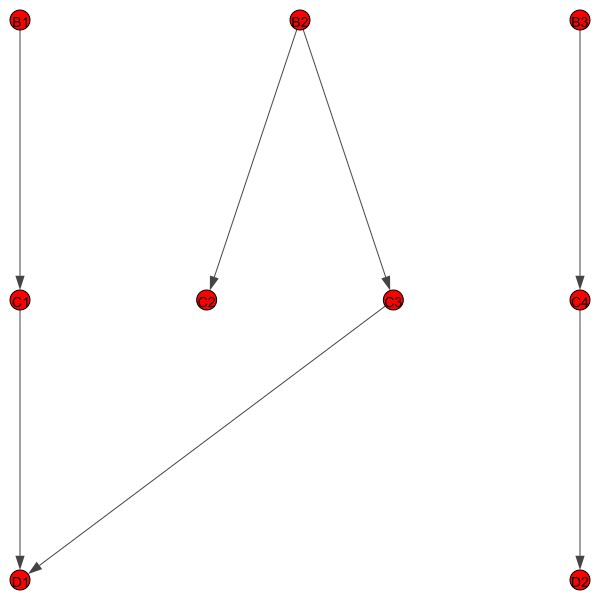

In [ ]:
g.delete_vertices('A1')
print(g.summary(verbosity=1))
layout = g.layout("tree")
g.vs["label"] = g.vs["name"]
ig.plot(g, layout=layout)

In [ ]:
g.vs['name']

['A1', 'A1', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'C4', 'D1', 'D2']

In [ ]:
g.add_vertex('A1')

igraph.Vertex(<igraph.Graph object at 0x000002B6F2643550>, 11, {'name': 'A1'})

In [ ]:
g.vs['name']

['A1', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'C4', 'D1', 'D2']

In [ ]:
type(g.vs['name'])

list

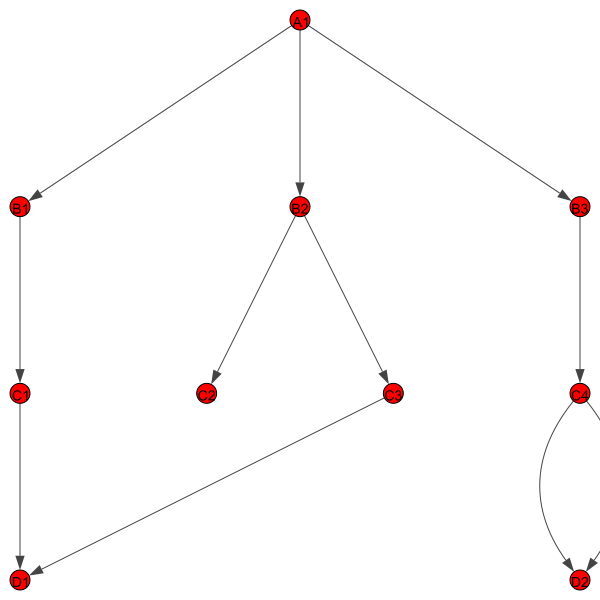

In [ ]:
layout = g.layout("tree")
g.vs["label"] = g.vs["name"]
ig.plot(g, layout=layout)

IGRAPH DN-- 10 11 -- 
+ attr: label (v), name (v)
+ edges (vertex names):
A1->B1, A1->B2, B1->C1, B2->C2, B2->C3, C1->D1, C3->D1, A1->B3, B3->C4, C4->D2, C4->D2


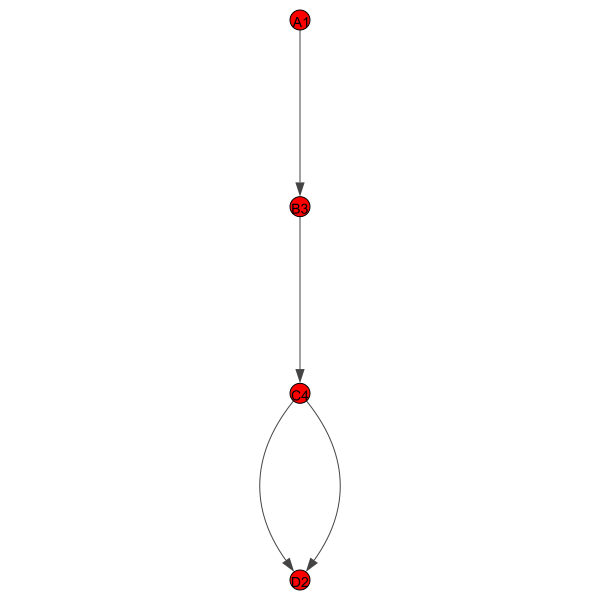

In [ ]:
gs = g.subgraph('A1 B3 C4 D2'.split())
print(g.summary(verbosity=1))
layout = gs.layout("tree")
gs.vs["label"] = gs.vs["name"]
ig.plot(gs, layout=layout)

In [ ]:
g.vs['A1'].successors()

KeyError: 'Attribute does not exist'

In [ ]:
g = ig.Graph(directed=True)
g.add_vertices('A1 B1 B2 B3 C1 C2 C3 C4 D1 D2'.split())
edges = [("A1", "B1"),
         ("A1", "B2"),
         ("B1", "C1"), 
         ("B2", "C2"),
         ("B2", "C3"),
         ("C1", "D1"), 
         ("C3", "D1"),
         ("A1", "B3"),
         ("B3", "C4"),
         ("C4", "D2"),
         ]

g.add_edges(edges)

print(g.summary(verbosity=1))
layout = g.layout("tree")
# g.vs["label"] = g.vs["name"]
ig.plot(g, layout=layout)

g2 = ig.Graph(directed=True)
g2.add_vertices('A1 B1 C5 D1'.split())
edges = [("A1", "B1"),
         ("B1", "C5"), 
         ("C5", "D1")
         ]

g2.add_edges(edges)

print(g2.summary(verbosity=1))
# g2.vs["label"] = g2.vs["name"]
ig.plot(g2, layout=g2.layout("tree"))

n = g.vs['name']
n2 = g2.vs['name']
g.add_vertices([x for x in n2 if x not in n])

g = ig.union([g, g2])

# g += g2
print(g.summary(verbosity=1))

# g.vs["label"] = g.vs["name"]
ig.plot(g, layout=g.layout("tree"))



In [20]:
import plotly
import plotly.graph_objs as go
import igraph as ig


In [27]:

lyout = 'tree' # 'kk', 'auto'

nr_vertices = len(g.vs['name'])
v_label = list(map(str, range(nr_vertices)))
G = g.copy()
lay = G.layout(lyout)

position = {k: lay[k] for k in range(nr_vertices)}
Y = [lay[k][1] for k in range(nr_vertices)]
M = max(Y)

es = ig.EdgeSeq(G) # sequence of edges
E = [e.tuple for e in G.es] # list of edges

L = len(position)
Xn = [position[k][0] for k in range(L)]
Yn = [2*M-position[k][1] for k in range(L)]
Xe = []
Ye = []
for edge in E:
    Xe+=[position[edge[0]][0],position[edge[1]][0], None]
    Ye+=[2*M-position[edge[0]][1],2*M-position[edge[1]][1], None]

labels = v_label

L = len(position)
Xn = [position[k][0] for k in range(L)]
Yn = [2*M-position[k][1] for k in range(L)]
Xe = []
Ye = []
for edge in E:
    Xe+=[position[edge[0]][0],position[edge[1]][0], None]
    Ye+=[2*M-position[edge[0]][1],2*M-position[edge[1]][1], None]

labels = v_label

#Create Plotly Traces

import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=Xe,
                   y=Ye,
                   mode='lines',
                   line=dict(color='rgb(210,210,210)', width=1),
                   hoverinfo='none'
                   ))
fig.add_trace(go.Scatter(x=Xn,
                  y=Yn,
                  mode='markers',
                  name='bla',
                  marker=dict(symbol='circle-dot',
                                size=18,
                                color='#6175c1',    #'#DB4551',
                                line=dict(color='rgb(50,50,50)', width=1)
                                ),
                  text=labels,
                  hoverinfo='text',
                  opacity=0.8
                  ))

